In [ ]:
%load_ext autoreload
%autoreload 2

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
import geopandas
from models import model

In [3]:
MODEL = model.MultiBayes(data='./models/data.csv', name_matches='./models/name_matches.csv', kmeans_path = 'models/kmeans.pickle')

Model initializing.
Reading data...
Model loaded!


In [4]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

In [9]:
def cluster_map(model):    
    fig, ax = plt.subplots(figsize=(15, 11))
    base = world.plot(ax = ax, color='green', edgecolor='black', figsize = (15, 11))
    _ = sns.scatterplot(ax=base, y='latitude', x='longitude', hue='cluster', data=model.data, palette='inferno', legend=False)
    
    centers = model.kmeans.cluster_centers_
    X, Y = list(zip(*centers))
    annotations = []
    for i, (x, y) in enumerate(centers):
        anno = base.annotate(i, (X[i], Y[i]), fontsize=20, fontweight='bold',
                            bbox=dict(facecolor=(1,1,1,.6)))
        annotations.append(anno)
    adjust_text(annotations)
    plt.title('Cluster Map')
    plt.savefig('./static/images/cluster_map.png', bbox_inches='tight')
    
    return base

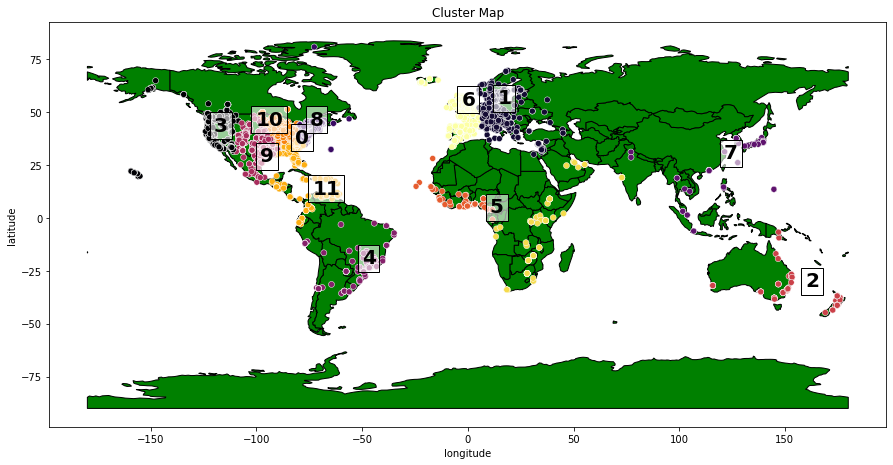

In [10]:
fig = cluster_map(MODEL)

In [13]:
fig

<AxesSubplot:title={'center':'Cluster Map'}, xlabel='longitude', ylabel='latitude'>

In [61]:
import dill as pickle

In [67]:
with open('./models/kmeans.pickle', 'wb') as f:
    pickle.dump(km, f)

In [68]:
with open('./models/kmeans.pickle', 'rb') as f:
    km2 = pickle.load(f)

In [69]:
km2.

KMeans(n_clusters=12)